In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
from PIL import Image
# import tensorflow as tf
from sklearn import decomposition
import cv2

In [2]:
labels =  ['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']

In [3]:
images = []
train_labels = []
for label_name in labels:
    folder_path = 'datasets/HandGesture/images/' + label_name
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))
        if img.mode != 'L':
            img = img.convert('L')
        img_arr = np.array(img)
        images.append(img_arr)
        train_labels.append(label_name)
train_images = np.array(images)

In [4]:
X = train_images.reshape(train_images.shape[0], -1)

In [5]:
X.shape

(5243, 46800)

In [6]:
train_images.shape

(5243, 195, 240)

# Feature Extraction using PCA

In [7]:
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(X)
standardized_data.shape

(5243, 46800)

In [8]:
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape

(46800, 46800)

In [12]:
pca = decomposition.PCA(n_components = 2)
principal_components = pca.fit_transform(standardized_data)

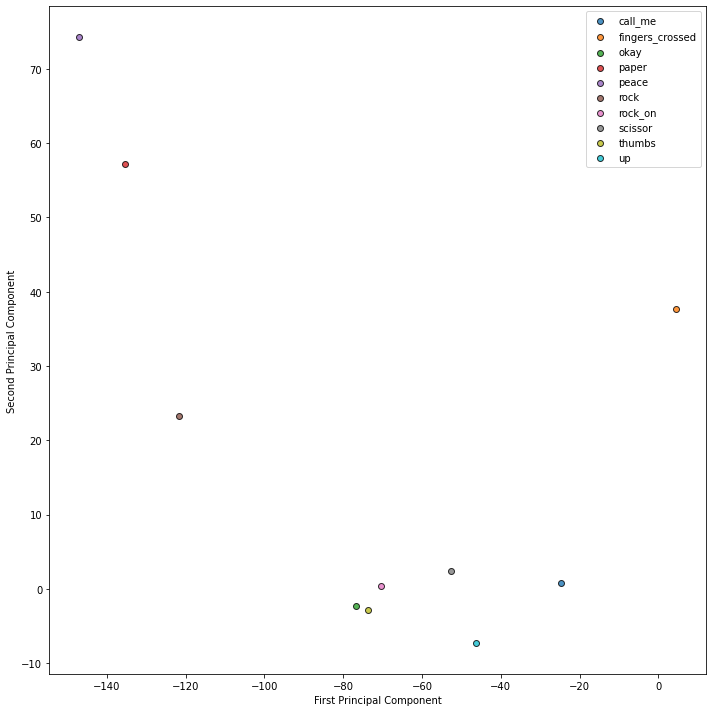

In [13]:
plt.figure(figsize=(10, 10))

colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))

for label, color in zip(labels, colors):
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(principal_components[indices, 0], principal_components[indices, 1], 
                c=[color], label=label, edgecolors='k', alpha=0.8)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Feature Extration with HOG

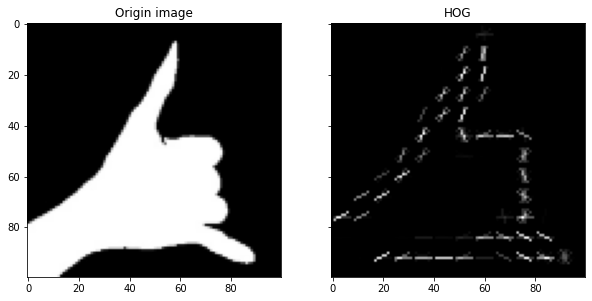

In [18]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import io


img_resized = resize(train_images[0], (100,100)) 


fd, hog_img = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True) 

ax1.imshow(img_resized, cmap=plt.cm.gray) 
ax1.set_title('Origin image') 

# Rescale histogram
hog_image_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('HOG')

plt.show()

